## Name : Asodariya Keyur
### Task 1 : Prediction using Supervised ML

### **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [122]:
%matplotlib inline

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [124]:
student_score = pd.read_csv('student_scores.csv')
student_score.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


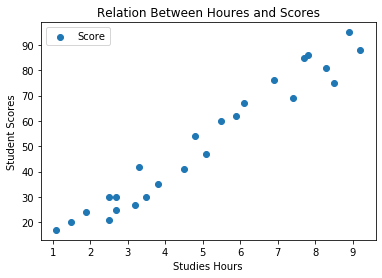

In [125]:
plt.figure()
hours = student_score['Hours']
scores = student_score['Scores']
plt.scatter(hours,scores,label= 'Score')
plt.xlabel('Studies Hours')
plt.ylabel('Student Scores')
plt.title('Relation Between Houres and Scores')
plt.legend()
plt.show()

In [126]:
X = student_score.iloc[:, :-1].values  

In [127]:
y= student_score.iloc[ : ,1].values

### Training Model

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [129]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
 regression.coef_

array([9.90776491])

In [131]:
regression.intercept_

1.615787215787222

In [132]:
line = regression.coef_*X+regression.intercept_

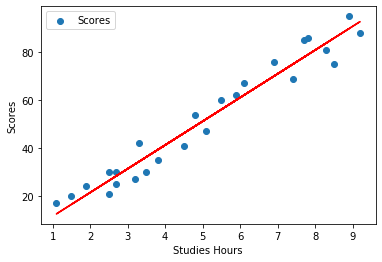

In [133]:
plt.scatter(X,y,label='Scores')
plt.plot(X,line,'r')
plt.xlabel('Studies Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

## Predictions

In [134]:
print(X_test)
y_pred = regression.predict(X_test)

[[9.2]
 [4.8]
 [6.1]
 [1.5]
 [2.7]]


In [135]:
df = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df

,Actual,Predict
0,88,92.767224
1,54,49.173059
2,67,62.053153
3,20,16.477435
4,25,28.366752


### **Predict Own Score**

In [136]:
hours=np.array(9.25)
hours=hours.reshape(1, -1)
own_score = regression.predict(hours)
own_score[0]

93.26261261261261

### **Evaluating the model**

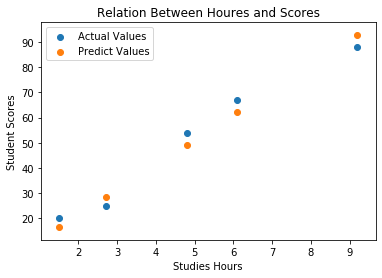

Mean Absolute Error  4.286066066066064


In [137]:
from sklearn import metrics
plt.scatter(X_test,y_test,label='Actual Values')
plt.scatter(X_test,y_pred,label='Predict Values')
plt.xlabel('Studies Hours')
plt.ylabel('Student Scores')
plt.title('Relation Between Houres and Scores')
plt.legend()
plt.show()
print('Mean Absolute Error ', metrics.mean_absolute_error(y_test,y_pred))
